# **Cyberbullying**

Dataset = https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

# **Carregar dados**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("cyberbullying_tweets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [18]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# **Análise dos Atributos**

In [19]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7998
age,7992
gender,7973
ethnicity,7961
not_cyberbullying,7945
other_cyberbullying,7823


In [20]:
valores_ausentes = df.isnull().sum(axis=0)
print('Quantidade de valores faltantes para cada variável do dataset:')
print(valores_ausentes)

Quantidade de valores faltantes para cada variável do dataset:
tweet_text            0
cyberbullying_type    0
dtype: int64


In [21]:
#Substituir valores
df['cyberbullying_type'] = df['cyberbullying_type'].replace('religion',1)
df['cyberbullying_type'] = df['cyberbullying_type'].replace('age',2)
df['cyberbullying_type'] = df['cyberbullying_type'].replace('gender',3)
df['cyberbullying_type'] = df['cyberbullying_type'].replace('ethnicity',4)
df['cyberbullying_type'] = df['cyberbullying_type'].replace('not_cyberbullying',5)
df['cyberbullying_type'] = df['cyberbullying_type'].replace('other_cyberbullying',6)


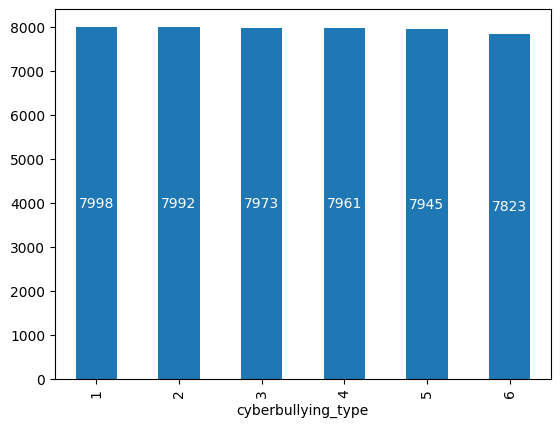

In [22]:
#Conjunto de dados original
ax = df['cyberbullying_type'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0],label_type='center', color='white');

In [23]:
#Inclui uma coluna binaria para indicar se é cyberbullying ou não
df["cyberbullying"] = [(t!=5) for t in df['cyberbullying_type']]

df.head()

,tweet_text,cyberbullying_type,cyberbullying
0,"In other words #katandandre, your food was cra...",5,False
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,False
2,@XochitlSuckkks a classy whore? Or more red ve...,5,False
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,False
4,@RudhoeEnglish This is an ISIS account pretend...,5,False


# **Pré-processamento**



In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#minusculo
def lowercase_text(text):
    return text.lower()

#remover tags
def remove_html(text):
    return re.sub(r'<[^<]+?>', '', text)

#remover urls
def remove_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

#remover pontuações e caracteres especiais
def remove_punctuations(text):
    tokens_list = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for char in text:
        if char in tokens_list:
            text = text.replace(char, ' ')

    return text

#remover emojis
def remove_emojis(text):
    emojis = re.compile("["
                        u"\U0001F600-\U0001F64F"
                        u"\U0001F300-\U0001F5FF"
                        u"\U0001F680-\U0001F6FF"
                        u"\U0001F1E0-\U0001F1FF"
                        u"\U00002500-\U00002BEF"
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"
                        u"\u3030"
                        "]+", re.UNICODE)

    text = re.sub(emojis, '', text)
    return text

#remover stopwords
def remove_stop_words(text):
    stop_words = stopwords.words('english')
    new_text = ''
    for word in text.split():
        if word not in stop_words:
            new_text += ''.join(f'{word} ')

    return new_text.strip()

#lematizar as palavras
def lem_words(text):
    lemma = WordNetLemmatizer()
    new_text = ''
    for word in text.split():
        new_text += ''.join(f'{lemma.lemmatize(word)} ')

    return new_text

#pre-processamento
def preprocess_text(text):
    text = lowercase_text(text)
    text = remove_html(text)
    text = remove_url(text)
    text = remove_punctuations(text)
    text = remove_emojis(text)
    text = remove_stop_words(text)
    text = lem_words(text)

    return text

#download
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
#Aplicar o pre-processamento
df['tweet_text'] = df['tweet_text'].apply(preprocess_text)
df.head()

,tweet_text,cyberbullying_type,cyberbullying
0,word katandandre food crapilicious mkr,5,False
1,aussietv white mkr theblock imacelebrityau tod...,5,False
2,xochitlsuckkks classy whore red velvet cupcake,5,False
3,jason gio meh p thanks head concerned another ...,5,False
4,rudhoeenglish isi account pretending kurdish a...,5,False


# **Classificação Binária**




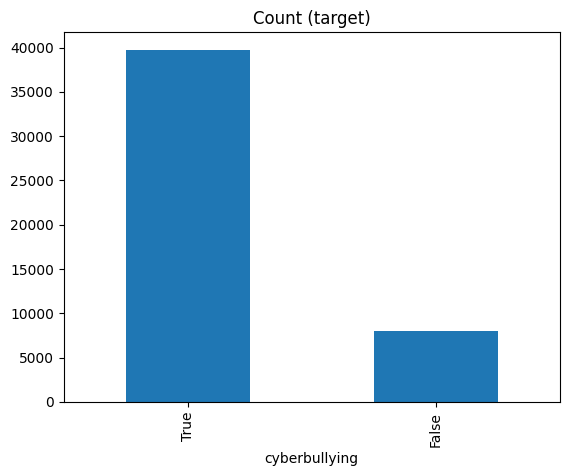

In [26]:
#Verifica se está balanceado
df['cyberbullying'].value_counts().plot(kind='bar', title='Count (target)');

SMOTE + StratifiedKFold com 3 Folds.



In [28]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

# X e Y
X = df['tweet_text'].values
y = df['cyberbullying'].values

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Classificadores
classifiers = {
    'SVC': SVC(kernel='linear', random_state=1),
    'MultinomialNB': MultinomialNB(),
    'MLPClassifier': MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='gini',random_state=1),
    'RandomForestClassifier': RandomForestClassifier(random_state=1)
}

# Função para cross-validation
def run_cross_validation(classifier, X, y):
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    cv_scores = []
    cv_f1_scores = []
    cv_precision_scores = []
    cv_recall_scores = []
    fold_counter = 1

    for train_index, val_index in stratified_kfold.split(X, y):
        print(f'Fold {fold_counter}:')

        # Conjunto de treinamento e teste
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Aplicar TF-IDF
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
        X_val_tfidf = tfidf_vectorizer.transform(X_val)

        # Aplicar SMOTE para balancear
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

        # Pipeline nos dados balanceados
        pipeline = make_pipeline(classifier)
        pipeline.fit(X_train_resampled, y_train_resampled)

        # Valores preditos
        y_pred = pipeline.predict(X_val_tfidf)

        # Calcular F1 e acurária
        f1 = f1_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        cv_f1_scores.append(f1)
        cv_scores.append(accuracy)
        cv_precision_scores.append(precision)
        cv_recall_scores.append(recall)

        print(f'Precisão: {precision:.4f}\n')
        print(f'Recall: {recall:.4f}\n')
        print(f'F1: {f1:.4f}')
        print(f'Acurácia: {accuracy:.4f}\n')

        print(classification_report(y_val, y_pred))

        fold_counter += 1

    # Médias dos scores
    print('Cross-validation Precision:', cv_precision_scores)
    print('Mean Precision:', sum(cv_precision_scores) / len(cv_precision_scores))

    print('Cross-validation Recall:', cv_recall_scores)
    print('Mean Recall:', sum(cv_recall_scores) / len(cv_recall_scores))

    print('Cross-validation F1:', cv_f1_scores)
    print('Mean F1:', sum(cv_f1_scores) / len(cv_f1_scores))

    print('Cross-validation acurácia:', cv_scores)
    print('Mean acurácia:', sum(cv_scores) / len(cv_scores))
    print('\n')

# Executa para cada classificador
for clf_name, clf in classifiers.items():
    print(f'Classificador: {clf_name}')
    run_cross_validation(clf, X, y)


Classificador: SVC
Fold 1:
Precisão: 0.9587

Recall: 0.8167

F1: 0.8821
Acurácia: 0.8180

              precision    recall  f1-score   support

       False       0.47      0.82      0.60      2649
        True       0.96      0.82      0.88     13249

    accuracy                           0.82     15898
   macro avg       0.72      0.82      0.74     15898
weighted avg       0.88      0.82      0.84     15898

Fold 2:
Precisão: 0.9585

Recall: 0.8148

F1: 0.8808
Acurácia: 0.8163

              precision    recall  f1-score   support

       False       0.47      0.82      0.60      2648
        True       0.96      0.81      0.88     13249

    accuracy                           0.82     15897
   macro avg       0.71      0.82      0.74     15897
weighted avg       0.88      0.82      0.83     15897

Fold 3:
Precisão: 0.9551

Recall: 0.8245

F1: 0.8850
Acurácia: 0.8214

              precision    recall  f1-score   support

       False       0.48      0.81      0.60      2648
     

Apenas StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Matriz de Confusão
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Labels Preditos')
    plt.ylabel('Labels Verdadeiros')
    plt.title(f'Matrix de Confusão {model_name}')
    plt.show()

# Métricas de Avaliação
def print_evaluation_metrics(y_true, y_pred, model_name, average='binary'):
    print(f"Modelo {model_name} - F1: %1.4f\n" % f1_score(y_true, y_pred, average=average))

    print(f"Relatório de Classificação {model_name}:")
    print(classification_report(y_true, y_pred))


def evaluate_model(modelName, model, labels, X, y):
  tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
  X_tfidf = tfidf_vectorizer.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=1)

  cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

  cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

  print(f'Modelo {model} - Acurácia: {cv_scores}')
  print(f'Modelo {model} - Média acurácia: {cv_scores.mean()}')

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print_evaluation_metrics(y_test, y_pred, modelName)
  plot_confusion_matrix(y_test, y_pred, labels, modelName)




Modelo MultinomialNB() - Acurácia: [0.86066992 0.8609058  0.85751356]
Modelo MultinomialNB() - Média acurácia: 0.8596964279908926
Modelo NB - F1: 0.9218

Relatório de Classificação NB:
              precision    recall  f1-score   support

       False       0.71      0.29      0.41      1589
        True       0.87      0.98      0.92      7950

    accuracy                           0.86      9539
   macro avg       0.79      0.63      0.67      9539
weighted avg       0.85      0.86      0.84      9539



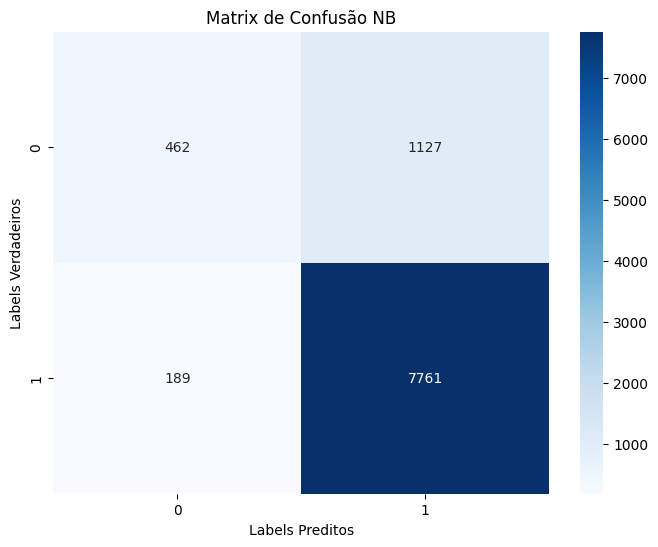

In [ ]:
from sklearn.naive_bayes import MultinomialNB

X = df['tweet_text'].astype(str)  # Convert to string to handle any non-string values
y = df['cyberbullying']  # Target variable
labels=[0,1]

#Naive bayes
naive_bayes = MultinomialNB()
evaluate_model('NB',naive_bayes,labels,X,y)

Modelo SVC(kernel='linear', random_state=1) - Acurácia: [0.87521623 0.87419406 0.86946607]
Modelo SVC(kernel='linear', random_state=1) - Média acurácia: 0.8729587845591299
Modelo SVC - F1: 0.9278

Relatório de Classificação SVC:
              precision    recall  f1-score   support

       False       0.74      0.38      0.50      1589
        True       0.89      0.97      0.93      7950

    accuracy                           0.87      9539
   macro avg       0.81      0.68      0.71      9539
weighted avg       0.86      0.87      0.86      9539



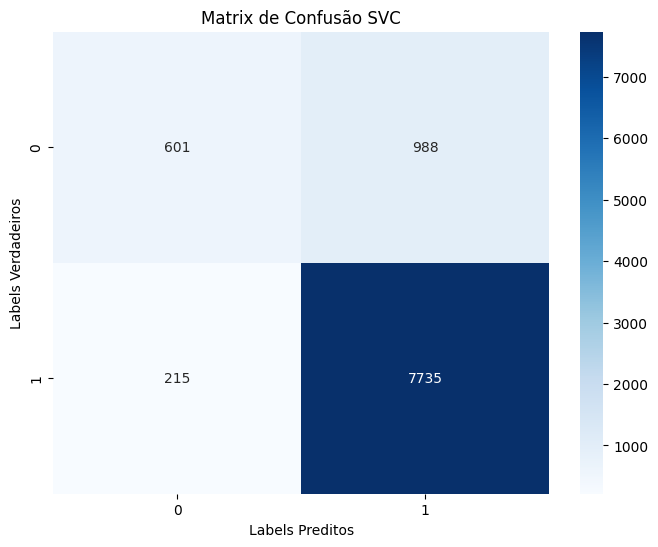

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=1)
evaluate_model('SVC',svc,labels,X,y)

Modelo MLPClassifier(hidden_layer_sizes=(15,), max_iter=2000, random_state=1) - Acurácia: [0.82725271 0.82434345 0.82605961]
Modelo MLPClassifier(hidden_layer_sizes=(15,), max_iter=2000, random_state=1) - Média acurácia: 0.8258852560571697
Modelo MLP - F1: 0.9005

Relatório de Classificação MLP:
              precision    recall  f1-score   support

       False       0.50      0.48      0.49      1589
        True       0.90      0.90      0.90      7950

    accuracy                           0.83      9539
   macro avg       0.70      0.69      0.69      9539
weighted avg       0.83      0.83      0.83      9539



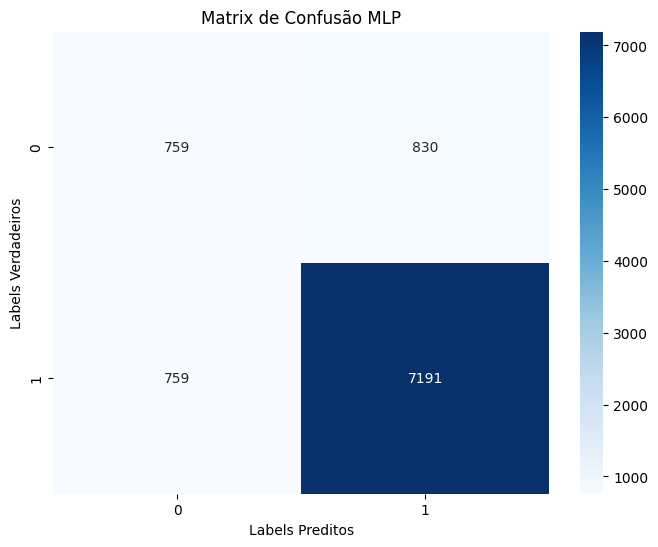

In [ ]:
from sklearn.neural_network import MLPClassifier

#MLP
mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)
evaluate_model('MLP',mlp,labels,X,y)

Modelo DecisionTreeClassifier() - Acurácia: [0.84604498 0.843922   0.83982071]
Modelo DecisionTreeClassifier() - Média acurácia: 0.8432625627905969
Modelo Árvore de Decisão - F1: 0.9016

Relatório de Classificação Árvore de Decisão:
              precision    recall  f1-score   support

       False       0.51      0.48      0.49      1589
        True       0.90      0.91      0.90      7950

    accuracy                           0.83      9539
   macro avg       0.70      0.69      0.70      9539
weighted avg       0.83      0.83      0.83      9539



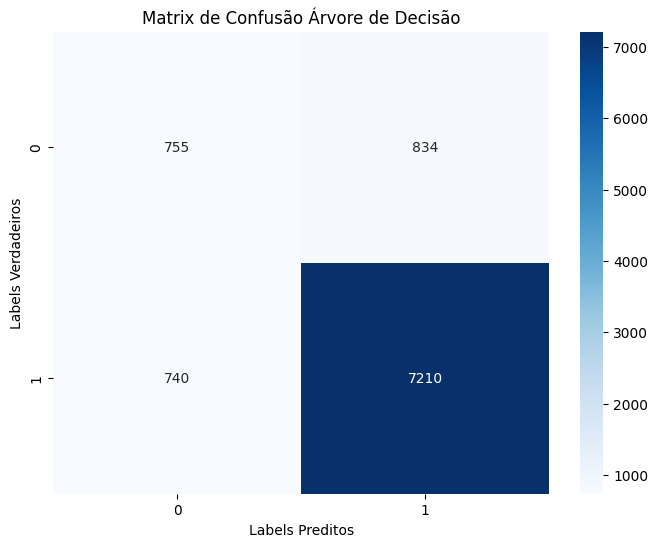

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Árvore de Decisão
dt = DecisionTreeClassifier(criterion='gini')
evaluate_model('Árvore de Decisão',dt,labels,X,y)

Modelo RandomForestClassifier(random_state=0) - Acurácia: [0.86680296 0.86593804 0.86388299]
Modelo RandomForestClassifier(random_state=0) - Média acurácia: 0.8655413294278783
Modelo Random Forest - F1: 0.9150

Relatório de Classificação Random Forest:
              precision    recall  f1-score   support

       False       0.59      0.42      0.49      1589
        True       0.89      0.94      0.92      7950

    accuracy                           0.85      9539
   macro avg       0.74      0.68      0.70      9539
weighted avg       0.84      0.85      0.84      9539



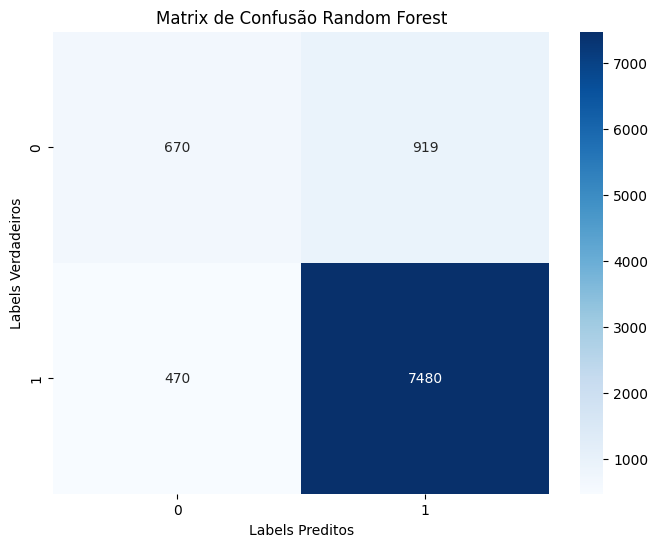

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
rfc = RandomForestClassifier(random_state=0)
evaluate_model('Random Forest',rfc,labels,X,y)

# **Classificação Multiclasse**

Considerando o texto "tweet_text" e a classe cyberbullying_type.

Possíveis valores para classe:
1 = religion
2 = age
3 = gender
4 = ethnicity
5 = not_cyberbullying
6 = other_cyberbullying



In [ ]:
from sklearn.model_selection import train_test_split

X= df['tweet_text']
y= df['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 12)



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler as encoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, metrics
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svc2 = SVC(kernel='linear', random_state=1)
svc2.fit(tfidf_train, y_train)
y_pred_svc2 = svc2.predict(tfidf_test)

naive_bayes2 = MultinomialNB()
naive_bayes2.fit(tfidf_train, y_train)
y_pred_nb2 = naive_bayes2.predict(tfidf_test)

mlp2 = MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)
mlp2.fit(tfidf_train, y_train)
y_pred_mlp2 = mlp2.predict(tfidf_test)

dt2 = DecisionTreeClassifier(criterion='gini')
dt2.fit(tfidf_train, y_train)
y_pred_dt2 = dt2.predict(tfidf_test)


rfc2 = RandomForestClassifier(random_state=0)
rfc2.fit(tfidf_train, y_train)
y_pred_rf2 = rfc2.predict(tfidf_test)

# **Avaliação Multiclasse**

In [ ]:
# Criando DataFrame com resultados
# Considerar SVC = SVC, NB = MultinomialNB, MLP = MLPClassifier, DT = DecisionTreeClassifier, RF = RandomForestClassifier, RC = RidgeClassifier
results_df = pd.DataFrame({'tweet_text': X_test, 'original cyberbullying_type': y_test, 'predicted cyberbullying_type SVC': y_pred_svc2, 'predicted cyberbullying_type NB': y_pred_nb2, 'predicted cyberbullying_type MLP': y_pred_mlp2, 'predicted cyberbullying_type DT': y_pred_dt2, 'predicted cyberbullying_type RF': y_pred_rf2, 'predicted cyberbullying_type RC': y_pred_rf2})
results_df.head()


,tweet_text,original cyberbullying_type,predicted cyberbullying_type SVC,predicted cyberbullying_type NB,predicted cyberbullying_type MLP,predicted cyberbullying_type DT,predicted cyberbullying_type RF,predicted cyberbullying_type RC
1894,rt billclintonthof giuliani call obama – can’t...,5,1,1,1,5,1,1
27935,srhbutts wait become pedozoophile,6,6,6,5,5,5,5
22900,dont understand specific urdu dialect karnatak...,1,1,1,1,1,1,1
47169,tayyoung fuck obama dumb as nigger pic twitter...,4,4,4,4,4,4,4
18585,rt rudawenglish isi begun recruiting moroccan ...,1,5,1,5,5,5,5


In [ ]:
#SVC

# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred_svc2, 'SVC', 'macro')

Modelo SVC - F1: 0.8442

Relatório de Classificação SVC:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1634
           2       0.96      0.98      0.97      1605
           3       0.90      0.87      0.89      1565
           4       0.97      0.98      0.98      1593
           5       0.62      0.57      0.59      1520
           6       0.65      0.70      0.68      1622

    accuracy                           0.85      9539
   macro avg       0.84      0.85      0.84      9539
weighted avg       0.85      0.85      0.85      9539



In [ ]:
#Naive Bayes

# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred_nb2, 'NB', 'macro')

Modelo NB - F1: 0.7430

Relatório de Classificação NB:
              precision    recall  f1-score   support

           1       0.82      0.97      0.88      1634
           2       0.71      0.98      0.82      1605
           3       0.81      0.86      0.84      1565
           4       0.83      0.93      0.88      1593
           5       0.66      0.39      0.49      1520
           6       0.69      0.45      0.54      1622

    accuracy                           0.77      9539
   macro avg       0.75      0.76      0.74      9539
weighted avg       0.76      0.77      0.74      9539



In [ ]:
#MLP

# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred_mlp2, 'MLP', 'macro')

Modelo MLP - F1: 0.8023

Relatório de Classificação MLP:
              precision    recall  f1-score   support

           1       0.95      0.94      0.95      1634
           2       0.95      0.95      0.95      1605
           3       0.84      0.85      0.85      1565
           4       0.98      0.98      0.98      1593
           5       0.51      0.53      0.52      1520
           6       0.58      0.56      0.57      1622

    accuracy                           0.80      9539
   macro avg       0.80      0.80      0.80      9539
weighted avg       0.80      0.80      0.80      9539



In [ ]:
#Árvore de Decisão

# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred_dt2, 'Árvore de Decisão', 'macro')

Modelo Árvore de Decisão - F1: 0.8062

Relatório de Classificação Árvore de Decisão:
              precision    recall  f1-score   support

           1       0.95      0.94      0.94      1634
           2       0.98      0.97      0.98      1605
           3       0.87      0.85      0.86      1565
           4       0.98      0.98      0.98      1593
           5       0.50      0.53      0.52      1520
           6       0.55      0.56      0.55      1622

    accuracy                           0.81      9539
   macro avg       0.81      0.80      0.81      9539
weighted avg       0.81      0.81      0.81      9539



In [ ]:
#Random Forest

# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred_rf2, 'Random Forest', 'macro')

Modelo Random Forest - F1: 0.8317

Relatório de Classificação Random Forest:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1634
           2       0.98      0.98      0.98      1605
           3       0.91      0.85      0.88      1565
           4       0.99      0.99      0.99      1593
           5       0.59      0.52      0.55      1520
           6       0.58      0.69      0.63      1622

    accuracy                           0.83      9539
   macro avg       0.84      0.83      0.83      9539
weighted avg       0.84      0.83      0.83      9539

